In [10]:
#http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
import pandas as pd
import numpy as np
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
#print df_wine
#print df_wine.shape
df_wine.columns = [
'Class Label',
'Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash',  
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline',]
#df_wine

In [11]:
print 'Class Label',np.unique(df_wine['Class Label'])

Class Label [1 2 3]


In [12]:
df_wine.head(n=9)

,Class Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [35]:
from sklearn.model_selection import train_test_split

X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
#print type(y)-> <type 'numpy.ndarray'>
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


- 根据序列 iloc
- 根据标签 loc

#### 4.4 將特徵值縮放到相同區間(Feature Scaling)

##### 1. Normalization(MinMaxScaler)
##### 2. Standardization(StandardScaler)

- 當遇到需將數值限定在一個有界區間時 -> 最小最大縮放
- 但是大部分ML Algorithm 標準化更實用
    1. 因為logic regression SVC 之類的線性模型, 在訓練初階段, 權重初始化階段,....
    2. 標準化保持了異常值含有的有用訊息, 使算法受到這些值影響較小

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

stds = StandardScaler()
mms = MinMaxScaler()

X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

X_train_std = stds.fit_transform(X_train)
X_test_std = stds.transform(X_test)

#print X_train_norm
#print X_train_std

#### 4.5 選擇有意義的特徵
1. 如果模型在train data的表現比test data好很多 -> 模型overfitting
2. overfitting表示模型對train data裡某些觀測值fit非常好, 但train data與真實數據的分布並不一致
3. overfitting -> 較高方差(variance), 原因可能有建立在給定train data的模型過於複雜
4. 解決方案有:
    - 降低數據dimension
    - 選擇參數較少的簡單模型
    - 正則化引入罰項?
    - 收集更多訓練數據(但一般來說不適用)

###### 4.5.1 使用L1正則化滿足數據稀疏化
<a href=https://read01.com/denmAk.html#.Wfaw_Gi0OUk>L1 L2正則化解釋</a>

- 先理解觀念 和 使用條件限制
- 數學模型有空再看....

In [15]:
from sklearn.linear_model import LogisticRegression
#LogisticRegression(penalty='l1')
lr = LogisticRegression(penalty='l1',C=0.1)
lr.fit(X_train_std,y_train)

print 'training accuracy', lr.score(X_train_std,y_train)
print 'test accuracy', lr.score(X_test_std,y_test)
print lr.intercept_
print lr.coef_

training accuracy 0.975609756098
test accuracy 0.981481481481
[-0.39564381 -0.07925907 -0.72033317]
[[ 0.34964555  0.          0.         -0.09751206  0.          0.
   0.46816094  0.          0.          0.          0.          0.10604476
   1.26832386]
 [-0.72617719 -0.10581067 -0.1461918   0.          0.          0.          0.
   0.          0.         -0.91537592  0.          0.         -0.27543441]
 [ 0.          0.07539445  0.          0.          0.          0.
  -0.75539063  0.          0.          0.57022001 -0.35588527 -0.37941565
   0.        ]]


**lr.intercept_ : 截距類第一項,類別1相對於類別2,3的匹配結果...以此類推**

**lr.coef_: 三個權重係數稀疏向量,**

#### 4.5.2序列特徵選擇法

In [20]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    
    def __init__(self,estimator,k_feature,scoring=accuracy_score,test_size=0.25,
                 random_state=1):
        
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_feature = k_feature
        self.test_size = test_size
        self.random_state = random_state
        
        
    def fit(self, X, y):
            X_train,X_test,y_train,y_test = \
            train_test_split(X,y,test_size=self.test_size,random_state = self.random_state)
            
            dim = X_train.shape[1]
            self.indices_ = tuple(range(dim))
            self.subsets_ = [self.indices_]
            score = self._calc_score(X_train,y_train,X_test,y_test,self.indices_)
            
            self.scores_ = [score]
            
            while dim > self.k_feature:
                scores = []
                subsets = []
                
                for p in combinations(self.indices_,r=dim-1):
                    score = self._calc_score(X_train,y_train,X_test,y_test,p)
                    
                    scores.append(score)
                    subsets.append(p)
                    
                best = np.argmax(scores)
                self.indices_ = subsets[best]
                self.subsets_.append(self.indices_)
                dim -= 1
                
                self.scores_.append(scores[best])
            self.k_score_ = self.scores_[-1]
            
            return self
                              
                          
            
    def transform(self,X):
        return  X[:,self.indices_]
      
    
    def _calc_score(self,X_train,y_train,X_test,y_test,indices):     
        self.estimator.fit(X_train[:,indices],y_train)
        y_pred =self.estimator.predict(X_test[:,indices])
        score = self.scoring(y_test,y_pred)
        return score
        

```python
class MyClass(object):
    i = 123
    def __init__(self):
         self.i = 345

a = MyClass()
print a.i
345
print MyClass.i
123
```

In [21]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn,k_feature=1)
sbs.fit(X_train_std,y_train)

<__main__.SBS instance at 0x000000000965F448>

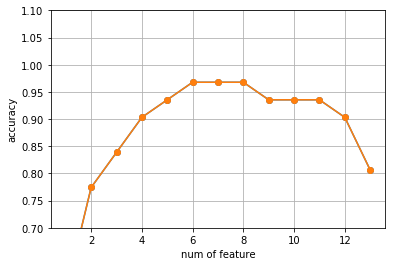

In [24]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.1])
plt.xlabel('num of feature')
plt.ylabel('accuracy')
plt.grid()
plt.show()

#### 隨機森林判定特徵的重要性

In [55]:
from sklearn.ensemble import RandomForestClassifier

feat_label = df_wine.columns[1:]
#print feat_label
forest = RandomForestClassifier(n_estimators=1000,random_state=0)

forest.fit(X_train,y_train)

importance = forest.feature_importances_

indices = np.argsort(importance)[::-1]

for f in range(X_train.shape[1]):
    print f+1,':',feat_label[f],'->',importance[indices[f]]

1 : Alcohol -> 0.17320944096
2 : Malic acid -> 0.157229633945
3 : Ash -> 0.148917149672
4 : Alcalinity of ash -> 0.115303580864
5 : Magnesium -> 0.109024691593
6 : Total phenols -> 0.0765708426511
7 : Flavanoids -> 0.0521404076338
8 : Nonflavanoid phenols -> 0.0430592988709
9 : Proanthocyanins -> 0.0361703786893
10 : Color intensity -> 0.0283094891077
11 : Hue -> 0.0274929806742
12 : OD280/OD315 of diluted wines -> 0.0177175674878
13 : Proline -> 0.0148545378525


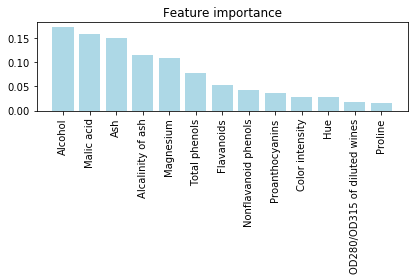

In [47]:
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]),importance[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_label,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()